# Importing Dependencies
---

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Importing Datasets
---

[Geopandas documentation](https://geopandas.org/en/stable/gallery/plotting_basemap_background.html) hints at [geodatasets](https://geodatasets.readthedocs.io/en/latest/) telling us it is possible to check available arguments for `.get_path` can be done via
```python
geodatasets.data.flatten().keys()
```

In [2]:
# Loading world data for the basemap
world_path = geodatasets.get_path("naturalearth.land")
world = gpd.read_file(world_path)

# World Cities
---
Found at (https://www.kaggle.com/datasets/juanmah/world-cities)

In [3]:
wc_df = pd.read_csv("data/worldcities.csv")

In [4]:
wc_df.columns

Index(['city', 'city_ascii', 'lat', 'lng', 'country', 'iso2', 'iso3',
       'admin_name', 'capital', 'population', 'id'],
      dtype='object')

In [5]:
len(wc_df)

47868

In [6]:
wc_geometry = [Point(xy) for xy in zip(wc_df["lng"], wc_df["lat"])]
wc_gdf = gpd.GeoDataFrame(wc_df, geometry=wc_geometry)

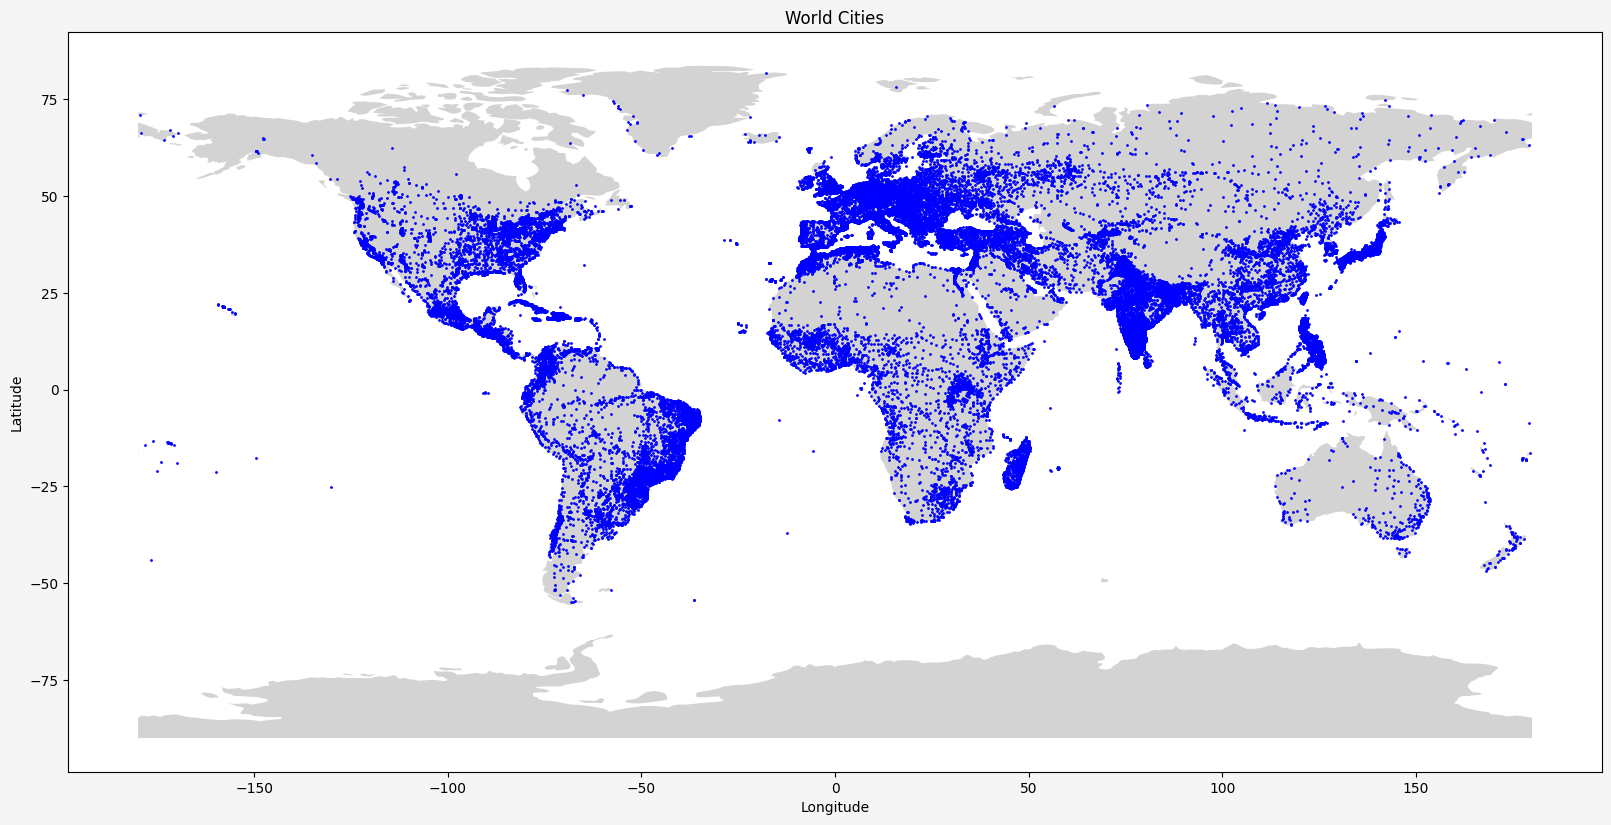

In [7]:
# Creating the figure and axes with Matplotlib
fig, ax = plt.subplots(figsize=(16, 9), facecolor="whitesmoke", layout="constrained")

# Plotting the world basemap on the axes
world.plot(ax=ax, color="lightgray")

# Plotting gdf
wc_gdf.plot(ax=ax, marker="o", color="blue", markersize=1)

# Adding titles, labels, etc...
ax.set_title("World Cities")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.savefig("world_wc.png")
plt.show()

# Global Power Plants 
---
Found at (https://www.kaggle.com/datasets/ramjasmaurya/global-powerplants)

In [8]:
pp_df = pd.read_csv("data/global_power_plants.csv")

In [9]:
pp_df.columns

Index(['country code', 'country_long', 'name of powerplant', 'capacity in MW',
       'latitude', 'longitude', 'primary_fuel', 'secondary fuel',
       'other_fuel2', 'other_fuel3', 'start date', 'owner of plant',
       'generation_gwh_2021', 'geolocation_source',
       'estimated_generation_gwh_2021'],
      dtype='object')

In [10]:
len(pp_df)

34936

In [11]:
pp_geometry = [Point(xy) for xy in zip(pp_df["longitude"], pp_df["latitude"])]
pp_gdf = gpd.GeoDataFrame(pp_df, geometry=pp_geometry)

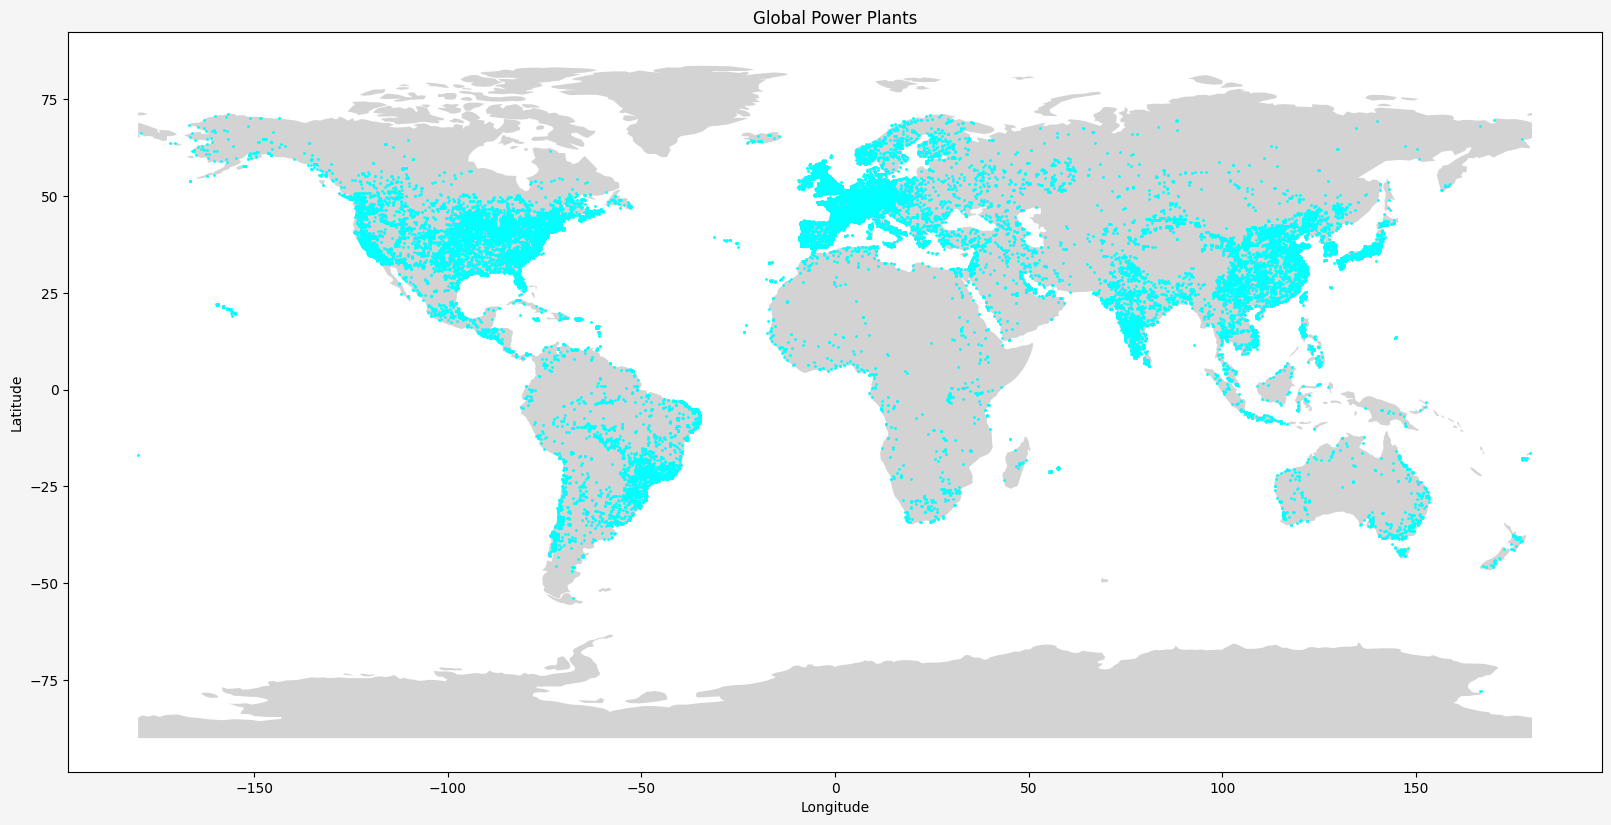

In [12]:
# Creating the figure and axes with Matplotlib
fig, ax = plt.subplots(figsize=(16, 9), facecolor="whitesmoke", layout="constrained")

# Plotting the world basemap on the axes
world.plot(ax=ax, color="lightgray")

# Plotting gdf
pp_gdf.plot(ax=ax, marker="o", color="cyan", markersize=1)

# Adding titles, labels, etc...
ax.set_title("Global Power Plants")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.savefig("world_pp.png")
plt.show()

# Meteorite Landings
---
Found at (https://www.kaggle.com/datasets/nasa/meteorite-landings)

In [13]:
ml_df = pd.read_csv("data/meteorite-landings.csv")

In [14]:
ml_df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')

In [15]:
len(ml_df)

45716

In [16]:
ml_df = ml_df[ml_df["reclong"] <= 200]

In [17]:
ml_geometry = [Point(xy) for xy in zip(ml_df["reclong"], ml_df["reclat"])]
ml_gdf = gpd.GeoDataFrame(ml_df, geometry=ml_geometry)

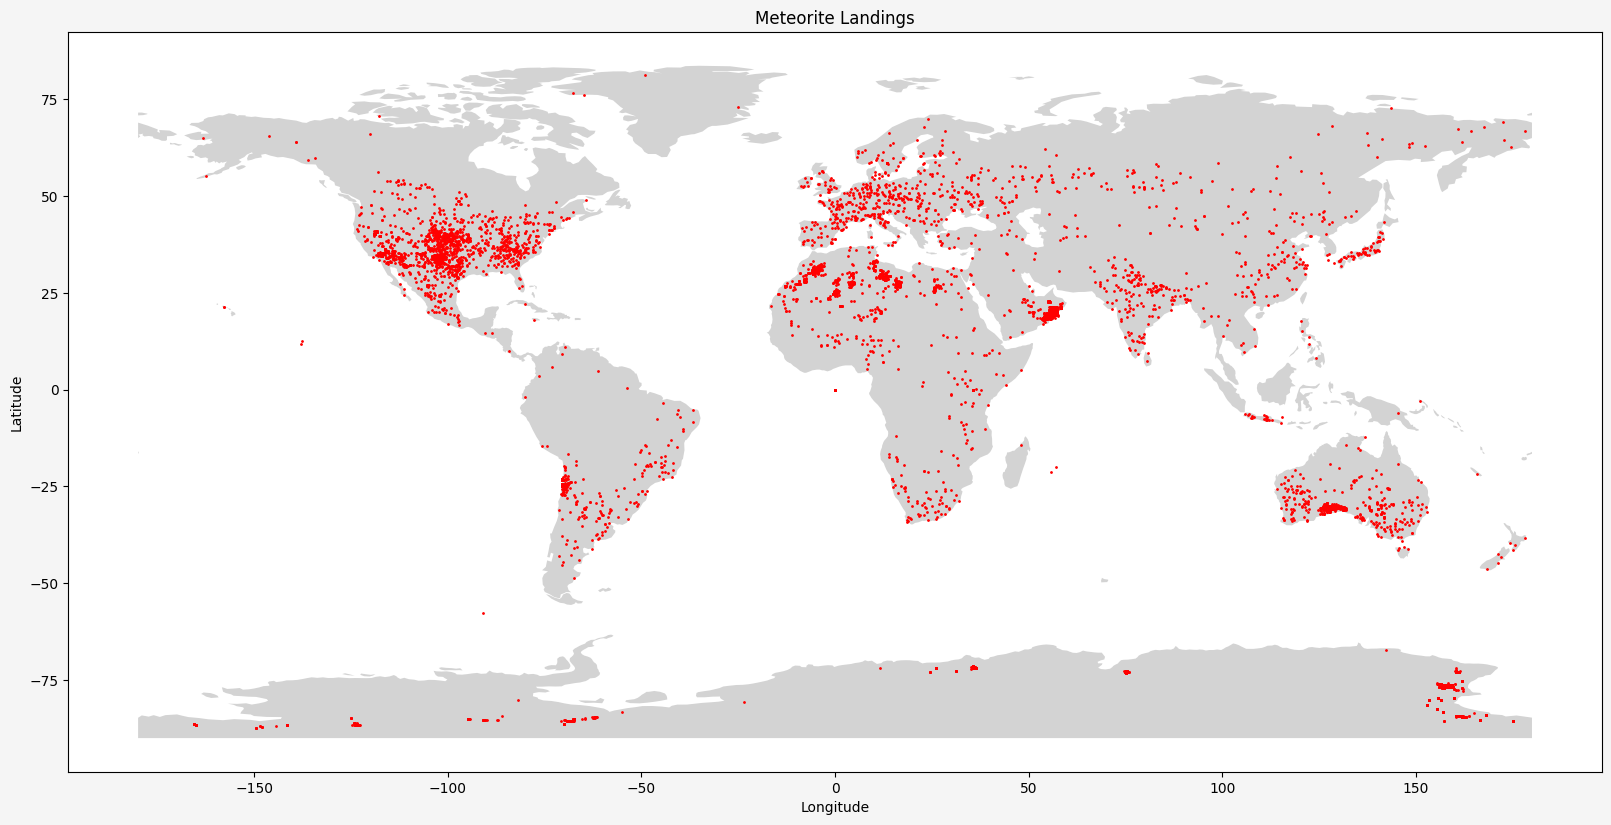

In [18]:
# Creating the figure and axes with Matplotlib
fig, ax = plt.subplots(figsize=(16, 9), facecolor="whitesmoke", layout="constrained")

# Plotting the world basemap on the axes
world.plot(ax=ax, color="lightgray")

# Plotting gdf
ml_gdf.plot(ax=ax, marker="o", color="red", markersize=1)

# Adding titles, labels, etc...
ax.set_title("Meteorite Landings")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.savefig("world_ml.png")
plt.show()

# Plotting Geolocations
---

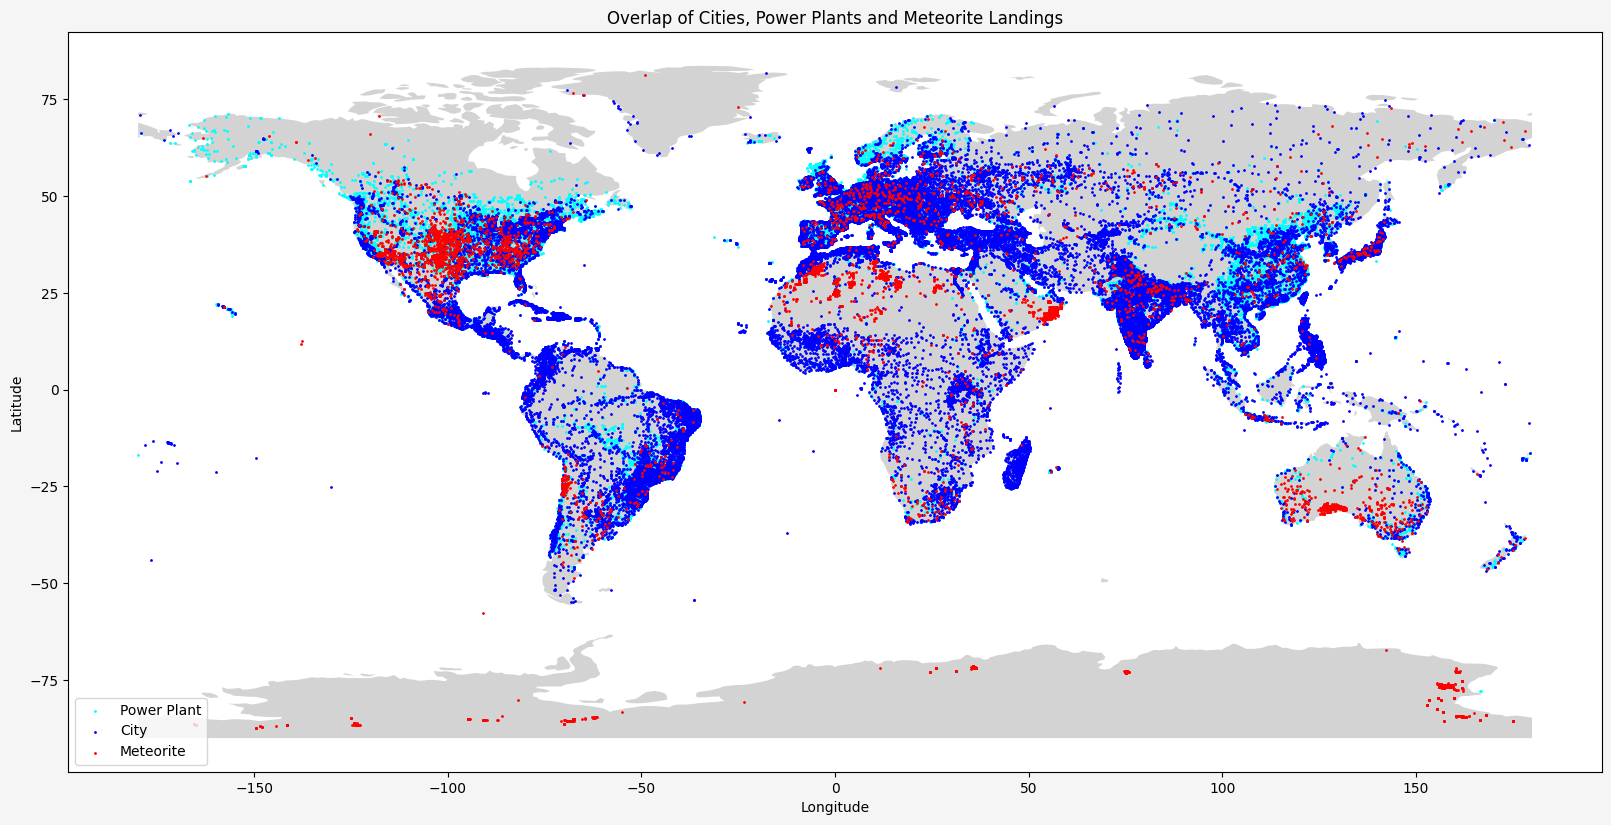

In [19]:
# Creating the figure and axes with Matplotlib
fig, ax = plt.subplots(figsize=(16, 9), facecolor="whitesmoke", layout="constrained")

# Plotting the world basemap on the axes
world.plot(ax=ax, color="lightgray")

# Plotting gdf
pp_gdf.plot(ax=ax, marker="o", color="cyan", markersize=1, label="Power Plant")
wc_gdf.plot(ax=ax, marker="o", color="blue", markersize=1, label="City")
ml_gdf.plot(ax=ax, marker="o", color="red", markersize=1, label="Meteorite")

# Adding titles, labels, etc...
ax.set_title("Overlap of Cities, Power Plants and Meteorite Landings")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

ax.legend(loc='lower left')

# Show the plot
plt.savefig("world_overlap.png")
plt.show()

In [20]:
# Section yet to be written...